In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [143]:
df=pd.read_csv("SVM Data set.csv")
df.head(20)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [144]:
print(df.columns)

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [145]:
df=df.drop('User ID',axis=1)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


Since The Column user id is not required We can drop that column

In [146]:
print(df.info)

<bound method DataFrame.info of      Gender  Age  EstimatedSalary  Purchased
0      Male   19            19000          0
1      Male   35            20000          0
2    Female   26            43000          0
3    Female   27            57000          0
4      Male   19            76000          0
..      ...  ...              ...        ...
395  Female   46            41000          1
396    Male   51            23000          1
397  Female   50            20000          1
398    Male   36            33000          0
399  Female   49            36000          1

[400 rows x 4 columns]>


We have to find the missing datas 

In [147]:
df['Gender'].unique()
df['Purchased'].unique()

array([0, 1], dtype=int64)

In [148]:
len(df.loc[(df['EstimatedSalary'] == 0) | (df['Age'] == 0) | (df['Gender'] == 0)] ) 

0

Therefore the are no nissing datas for age, gender and Salary

In [149]:
len(df) #To know how many data set values are there

400

In [150]:
df.columns = df.columns.str.strip()

In [151]:
df = pd.get_dummies(df, columns=['Gender'])

In [152]:
df.head(10)

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,False,True
1,35,20000,0,False,True
2,26,43000,0,True,False
3,27,57000,0,True,False
4,19,76000,0,False,True
5,27,58000,0,False,True
6,27,84000,0,True,False
7,32,150000,1,True,False
8,25,33000,0,False,True
9,35,65000,0,True,False


In [153]:
df = df.astype(int) # To convert to binary values
df.head(10)

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
5,27,58000,0,0,1
6,27,84000,0,1,0
7,32,150000,1,1,0
8,25,33000,0,0,1
9,35,65000,0,1,0


In [154]:
from sklearn.preprocessing import scale

In [155]:
X=df.drop('Purchased', axis='columns')
X_scaled= scale(X)

In [156]:
y=df['Purchased']

In [157]:
y.unique()

array([0, 1])

In [158]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [236]:
clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train_scaled,y_train)

SVC(random_state=42)

In [237]:
print(df['Purchased'].unique())

[0 1]


[[47  5]
 [ 2 26]]


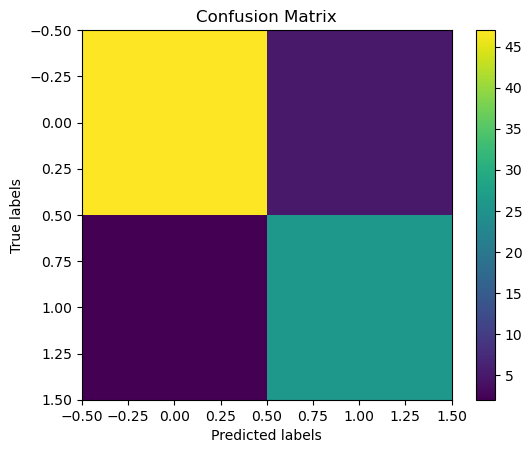

In [238]:
y_pred = clf_svm.predict(X_test_scaled)
c_m = confusion_matrix(y_test, y_pred)
print(c_m)
plt.imshow(c_m, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

we need to optimize for better result

In [239]:
from sklearn.model_selection import GridSearchCV # For cross validation

In [240]:
param_grid = [
    {'C':[0.5,1,10,100],
     'gamma' : ['scale',1,0.1,0.01,0.001,0.0001],
     'kernel' : ['rbf']},
]
optimal_params = GridSearchCV(
                        SVC(), param_grid,cv = 5,scoring = 'accuracy',verbose = 0)
optimal_params.fit(X_train_scaled,y_train)
print(optimal_params.best_params_)
    
                

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


Use this obtained value of c and gamma

In [241]:
clf_svm=SVC(random_state = 42,C=0.5,gamma=1)
clf_svm.fit(X_train_scaled,y_train)

SVC(C=0.5, gamma=1, random_state=42)

In [242]:
y_pred1 = clf_svm.predict(X_test_scaled)
c_m = confusion_matrix(y_test, y_pred1)
print(c_m)

[[47  5]
 [ 1 27]]


In [243]:
Test_data=pd.read_csv("SVM Test data.xlsx - Sheet1.csv")
Test_data

,Female,49,36000,1
0,Male,47,23000,1
1,Female,44,139000,1
2,Female,59,29000,1
3,Male,39,77000,0
4,Female,42,75000,0
5,Female,53,82000,1
6,Male,36,125000,1
7,Male,39,134000,1
8,Female,52,21000,1


Since one of the data came under the header, we will add it to a new row an rename the headers

In [244]:
print(Test_data.columns)

Index(['Female', '49', '36000', '1'], dtype='object')


In [245]:
data = {
    'Gender': ['Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female'],
    'Age': [49, 47, 44, 59, 39, 42, 53, 36, 39, 52],
    'EstimatedSalary': [36000, 23000, 139000, 29000, 77000, 75000, 82000, 125000, 134000, 21000],
    'Purchased': [1, 1, 1, 1, 0, 0, 1, 1, 1, 1]
}

In [246]:
Test_df= pd.DataFrame(data)
Test_df

,Gender,Age,EstimatedSalary,Purchased
0,Female,49,36000,1
1,Male,47,23000,1
2,Female,44,139000,1
3,Female,59,29000,1
4,Male,39,77000,0
5,Female,42,75000,0
6,Female,53,82000,1
7,Male,36,125000,1
8,Male,39,134000,1
9,Female,52,21000,1


In [247]:
Test_df = pd.get_dummies(Test_df, columns=['Gender'])
Test_df

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,49,36000,1,True,False
1,47,23000,1,False,True
2,44,139000,1,True,False
3,59,29000,1,True,False
4,39,77000,0,False,True
5,42,75000,0,True,False
6,53,82000,1,True,False
7,36,125000,1,False,True
8,39,134000,1,False,True
9,52,21000,1,True,False


In [248]:
Test_df = Test_df.astype(int) # To convert to binary values
Test_df

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,49,36000,1,1,0
1,47,23000,1,0,1
2,44,139000,1,1,0
3,59,29000,1,1,0
4,39,77000,0,0,1
5,42,75000,0,1,0
6,53,82000,1,1,0
7,36,125000,1,0,1
8,39,134000,1,0,1
9,52,21000,1,1,0


In [249]:
Test_Var =Test_df.drop('Purchased', axis=1)

In [250]:
Test_tar =Test_df['Purchased']

In [251]:
clf_svm.predict(Test_Var)

C:\Users\ganes\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [252]:
clf_svm.score(Test_Var,Test_tar)

C:\Users\ganes\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.8

In [254]:
clf_svm.score(X_test_scaled,y_test)  #to test the accuracy of test data (Just for reference)

0.925